### Import

In [1]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from matplotlib.colors import LogNorm
from sklearn import mixture
from mpl_toolkits import mplot3d

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Basic Standard Distribution with mu = 0, sigma = 1

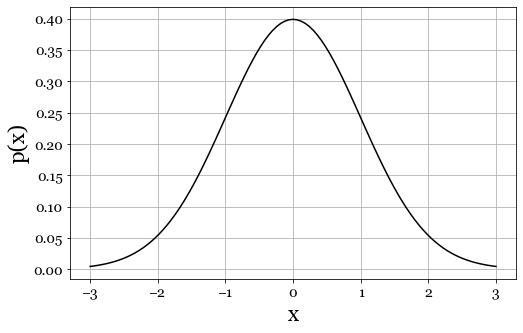

In [3]:
mu = 0
sigma = 1
rv = mnorm(mu,sigma)
xvalues = np.linspace(-3,3,101)
prob_iq = rv.pdf(xvalues)
plt.figure(figsize=(8,5));
plt.plot(xvalues,prob_iq,'k')
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('p(x)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.grid()
plt.savefig('../../assets/figures/013/normal.png',bbox_inches="tight")

### Parameters
Lets create two distribution, one for IQ across the population, and one for the average temperature in New York City across an entire year. 

In [4]:
mu_iq = 100
mu_temp = 70
sigma_iq = 15**2
sigma_temp = 30**2
mu = [mu_iq,mu_temp]
sigma = [[sigma_iq,0],[0,sigma_temp]]

### Create 1D Gaussians for IQ and temperature
We assume these values to be normally distributed, meaning we can sample the normal distribution with parameter mu (mean) and sigma (variance). Lets start with the one for IQ. As you can see, the mass of the distribution is centered on an IQ of 100. That's not by accident, it was defined that way. Similary, the standard deviation was also fixed. This allows for benchmarking different IQ tests. All tests should agree when they plot the distribution they record for a large group of individuals. If a test has a lower mean than all other tests, for the same group of indidivuals, it not aligned properly, and probably too hard compared to the standard.<br>
<br>
I am less certain about temperature being normally distributed, but feel free to look that up. Either case, I questimated the average temperature in New York is about 70 degrees, and with a standard deviation of about 30 degrees. 

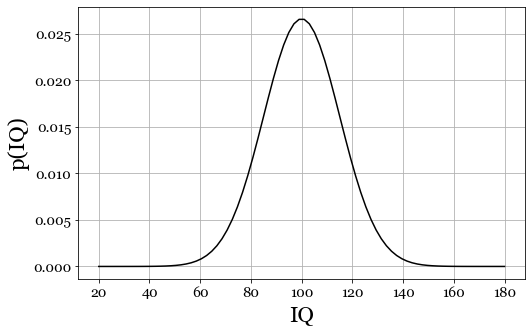

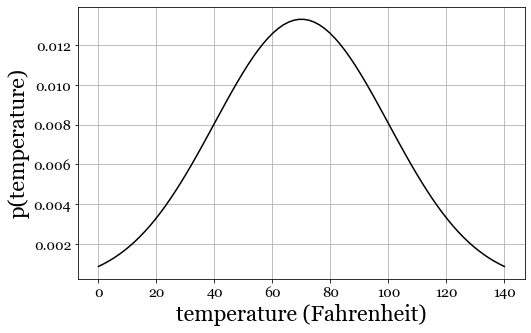

In [5]:
plt.figure(figsize=(8,5))
rv_iq = mnorm(mu_iq,sigma_iq)
xvalues = np.linspace(20,180,80)
prob_iq = rv_iq.pdf(xvalues)
plt.plot(xvalues,prob_iq,'k')
plt.xlabel('IQ',fontsize=22,**csfont);
plt.ylabel('p(IQ)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.grid()
plt.savefig('../../assets/figures/013/normal_iq.png',bbox_inches="tight")

plt.figure(figsize=(8,5))
rv_temp = mnorm(mu_temp,sigma_temp)
xvalues = np.linspace(0,140,80)
prob_temp = rv_temp.pdf(xvalues)
plt.plot(xvalues,prob_temp,'k')
plt.xlabel('temperature (Fahrenheit)',fontsize=22,**csfont);
plt.ylabel('p(temperature)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.grid()
plt.savefig('../../assets/figures/013/normal_temp.png',bbox_inches="tight")

### Create Joint Distribution with zero covariance
Now, suppose we measure the temperature in New York over the course of many years on each day. Again, I am not sure, but I expect it be normally distributed. But we do one other thing. On each day we also pick a random person and ask them what there IQ is (or test them, whatever you want). So, we end up with a large number of Temperature/IQ pairs. We can plot that as well. We count the number of times we see each possible pair and fill up our matrix of pairs as go along. And at the end of the day, we can plot that. Here is plotted as a 3D surface. The higher the surface, the more frequent the pair of temperature and IQ was observed. It should come as no surprise that most points are at the center, where specific temperature and IQ are more frequently observe. It is far more common to find some with an IQ of 100 on a day that the temperature is around 70 degrees, then let say, finding someone with an IQ of 160 on a day that it is 32 degrees. Because those two things by themselves are already uncommon. But there is some interesting here. The increase in probability at the center perfectly aligned with both axis. This has an important implication, statistically. It means that the two event are no dependent, they do not covary. Observing a specific temperature doesn't increase you changes of seeing a particular IQ. 

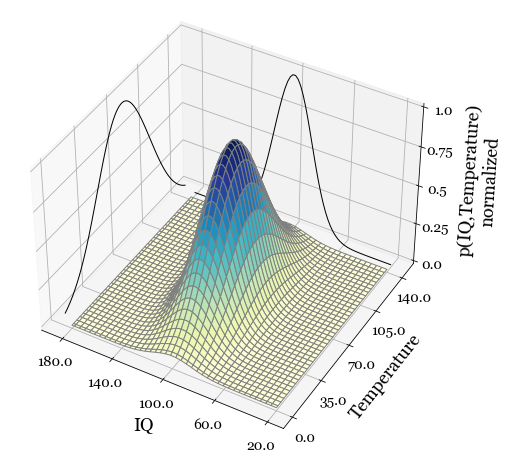

In [6]:
mu = [mu_iq,mu_temp]
rv = mnorm(mu,sigma)
x = np.linspace(20,180,80)
y = np.linspace(0,140,80)
cx = np.zeros((80,1))
cx[:] = -5
cy = np.zeros((80))
cy[:] = 185
X,Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z1 = rv.pdf(XX)
Z1 = Z1.reshape(X.shape)
Z1 = Z1 / np.max(Z1)
marginalx1 = np.sum(Z1,axis=1)
marginaly1 = np.sum(Z1,axis=0)
marginalx1 = marginalx1 / np.max(marginalx1)
marginaly1 = marginaly1 / np.max(marginaly1)

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z1,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly1, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx1, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nTemperature',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,Temperature)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_temp.png',bbox_inches="tight")
plt.show();

### Reconstruct

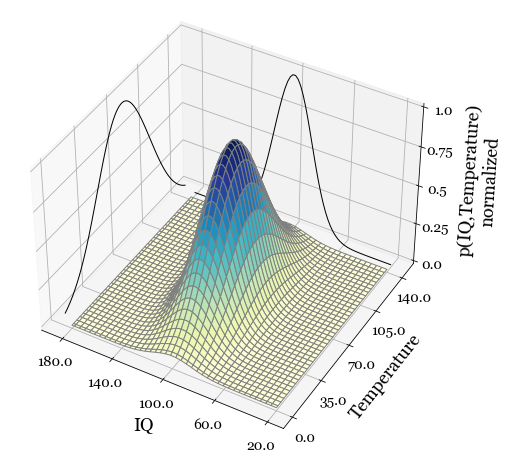

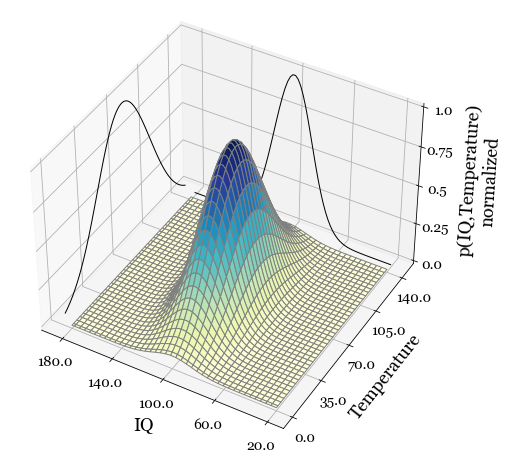

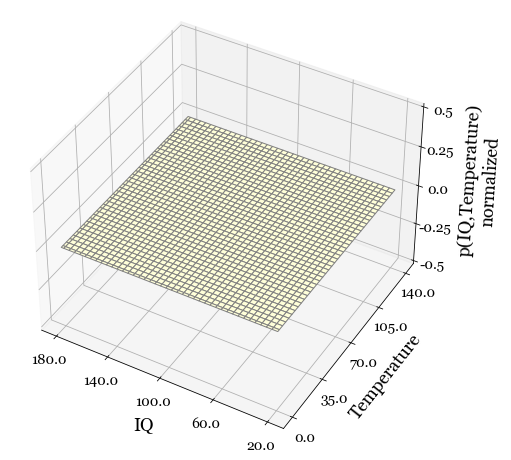

In [7]:
Z1m = np.dot(np.expand_dims(marginaly1,-1),np.expand_dims(marginalx1,-1).T).T

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z1m,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly1, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx1, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nTemperature',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,Temperature)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_temp_recon_01.png',bbox_inches="tight")
plt.show();

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z1,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly1, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx1, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nTemperature',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,Temperature)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_temp_recon_02.png',bbox_inches="tight")
plt.show();

Z0 = np.zeros((80,80))
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z0,cmap='YlGnBu', edgecolor='gray')
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(-0.5,0.5,5),labels=np.linspace(-0.5,0.5,5),fontsize=14,**csfont);
ax.set_ylabel('\nTemperature',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,Temperature)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_temp_recon_03.png',bbox_inches="tight")
plt.show();

### Create Joint Distribution with covariance
Let us do another experiment. Lets imagine we ask random people what there IQ is, as well as what their mothers IQ is. For the sake of argument, just believe they have that information at the ready and that it is correct. What do we expect now from our joint distribution? Well, we know that your mothers IQ has a great influence on you, both genetically, but also through child rearing choices. So, whenever you meet someone with a high IQ, it is more likely that their mother also had a high IQ. Such a relationship changes the joint distribution. It is no longer aligned with its axis. Instead, it has rotated as the diagonal in the joint distribution is where similar pairs can be found (your IQ ~ your mom's IQ). Plotting joint distributions of your data is good way of understanding whether events are independent or whether they are covarying together.  

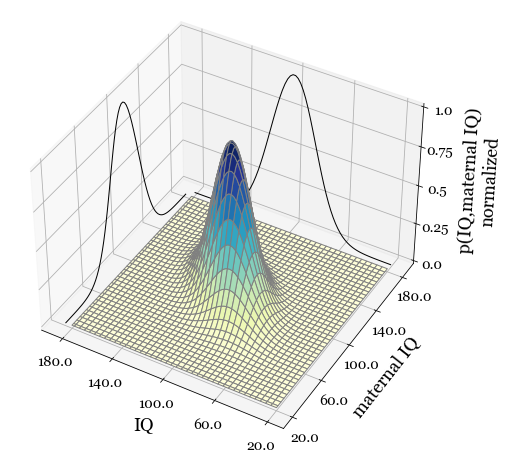

In [10]:
sigma_2 = [[320,240],[-160,320]]
mu_2 = [100,100]
rv = mnorm(mu_2,sigma_2)
x = np.linspace(20,180,80)
y = np.linspace(20,180,80)
cx = np.zeros((80,1))
cx[:] = 15
cy = np.zeros((80))
cy[:] = 185
X,Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z2 = rv.pdf(XX)
Z2 = Z2.reshape(X.shape)
Z2 = Z2 / np.max(Z2)
marginalx2 = np.sum(Z2,axis=1)
marginaly2 = np.sum(Z2,axis=0)
marginalx2 = marginalx2 / np.max(marginalx2)
marginaly2 = marginaly2 / np.max(marginaly2)

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z2,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly2, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx2, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(20,180,5),labels=np.linspace(20,180,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nmaternal IQ',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,maternal IQ)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_iq.png',bbox_inches="tight")
plt.show();

### Reconstruct

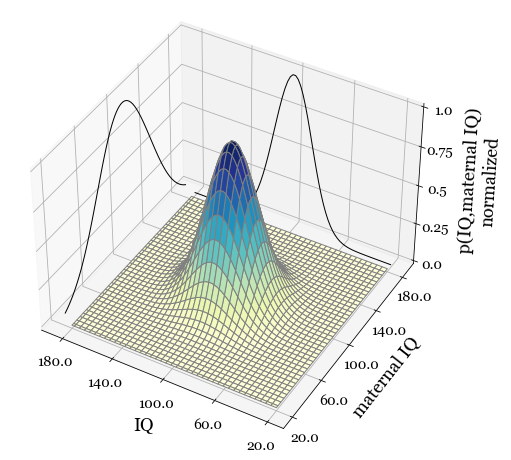

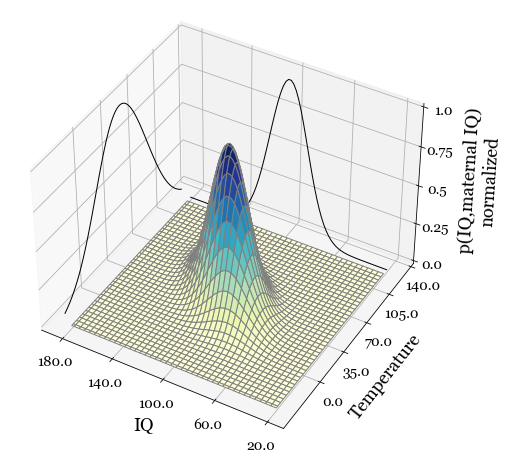

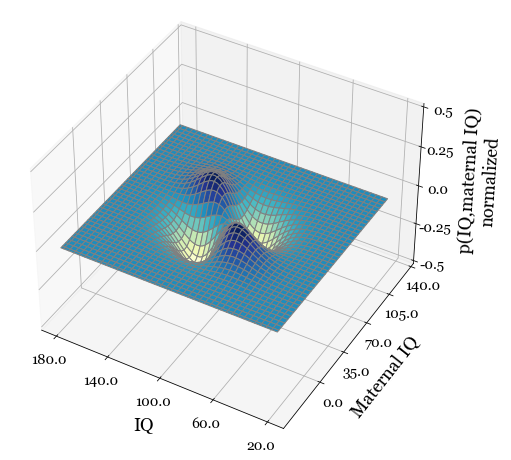

In [9]:
Z2m = np.dot(np.expand_dims(marginaly2,-1),np.expand_dims(marginalx2,-1).T).T
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z2m,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly1, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx1, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(20,180,5),labels=np.linspace(20,180,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nmaternal IQ',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,maternal IQ)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_iq_recon_01.png',bbox_inches="tight")
plt.show();

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z2,cmap='YlGnBu', edgecolor='gray')
ax.plot3D(x,cx, marginaly1, 'k',linewidth=1)
ax.plot3D(cy,y, marginalx1, 'k',linewidth=1)
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_ylabel('\nTemperature',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,maternal IQ)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_iq_recon_02.png',bbox_inches="tight")
plt.show();

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z2-Z2m,cmap='YlGnBu', edgecolor='gray')
ax.view_init(elev=40., azim=120)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,140,5),labels=np.linspace(0,140,5)[::-1],fontsize=14,**csfont);
ax.set_xticks(np.linspace(20,180,5),labels=np.linspace(20,180,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(-0.5,0.5,5),labels=np.linspace(-0.5,0.5,5),fontsize=14,**csfont);
ax.set_ylabel('\nMaternal IQ',fontsize=18,**csfont)
ax.set_xlabel('\nIQ',fontsize=18,**csfont)
ax.set_zlabel('\n\np(IQ,maternal IQ)\nnormalized', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/013/joint_iq_iq_recon_03.png',bbox_inches="tight")
plt.show();